## Домашнее задание
### 1. Апостериорное распределение для параметра распределения Пуассона.


Количество срабатываний счетчика Гейгера за минуту $n$ подчиняется распределению Пуассона:
$$
P_\lambda(n)=\frac{\lambda^n}{n !} e^{-\lambda} \text {. }
$$

1. В ходе эксперимента счетчик Гейгера сработал за минуту $m$ раз. С помощью теоремы Байеса определите апостериорное распределение на $\lambda$. Указание: априорную плотность вероятности $\lambda$ можно считать постоянной (так как мы изначально ничего не знаем про $\lambda$ ) .

$$
P(\lambda | m) = \frac {P_\lambda(m) * p_\lambda} {\int_\lambda P_\lambda(m) * p_\lambda}
= \frac {\frac {\lambda^m} {m!} } {\int_\lambda \frac {\lambda^m} {m!} d\lambda}
= \frac {\frac {\lambda^m} {m!} } {\frac {\lambda^{m + 1}} {(m + 1)!}}
= \frac {m + 1} \lambda
$$

2. Эксперимент повторили еще раз, в этот раз счетчик Гейгера сработал за минуту $m^{\prime}$ раз. Как обновилось апостериорное распределение на $\lambda$ ?

$$
P(\lambda|m|m')
= \frac {P(m'|\lambda|m) p_0(\lambda)} {\int_\lambda P(m'|\lambda|m) p_0(\lambda) d\lambda}
= \frac {\frac {m' + 1} \lambda p_0(\lambda)} {\int_\lambda \frac {m' + 1} \lambda p_0(\lambda) d\lambda}
$$
$$
\rightarrow \frac {\frac {m' + 1} \lambda p_0(0)} {(m' + 1) \ln(\lambda) p_0(0)}
= \frac 1 {\ln(\lambda)}
$$

**Примечание.**

Такая плотность вероятности не будет нормируема. Чтобы сделать рассуждение более строгим, можно ввести обрезку на очень больших $\lambda$ (так как это нереалистичные значения). Другими словами, можно считать, что априорная плотность вероятности $p_0(\lambda)-$ это какая-то очень медленно меняющаяся функция и как-то убывающая на бесконечности. Тогда в числителе и знаменателе формулы Байеса она будет домножаться на гораздо более быструю функцию и поэтому можно заменить $p_0(\lambda) \rightarrow p_0(0)$. Константа $p_0(0)$ должна сократиться в ходе вычислений.

### 2. Апостериорное распределение для аргумента нормального распределения.

Пусть имеется априорное распределение на вектор $\boldsymbol{x}$, задаваемое симметричной положительно определенной матрицей $A$ :
$$
p_0(\boldsymbol{x})=\frac{1}{Z} e^{-\frac{\boldsymbol{x}^T A \boldsymbol{x}}{2}} .
$$
Было произведено измерение величин $\boldsymbol{x}$, которое дало значение $\boldsymbol{x}_1$. Найдете апостериорное распределение на $\boldsymbol{x}$.

Hint: Мы изначально ничего не знаем об $A$ - надо ввести на него какое-то априорное распределение. Предлагается брать равномерное.

$$
p(x) = \frac {p_0(x_1) P(A)} {\int_A p_0(x_1) P(A) dA}
= \frac {\exp(-\frac {x_1^T A x_1} 2) P(A)} {\int_A \exp(-\frac {x_1^T A x_1} 2) P(A) dA}
= \frac {\exp(-\frac {x_1^T A x_1} 2)} {\int_A \exp(-\frac {x_1^T A x_1} 2) dA}
$$
$$
= \frac {\exp(-\frac {z_1^T S z_1} 2)} {\int_S \exp(-\frac {z_1^T S z_1} 2) dS}
= \frac {\exp(-\frac {z_1^T S z_1} 2)} {\int_S \prod_i \exp(-\frac {z_{1i} ^ 2 \lambda_i} 2) dS}
= \frac {\exp(-\frac {z_1^T S z_1} 2)} {\prod_i \int_{\lambda_i} \exp(-\frac {z_{1i} ^ 2 \lambda_i} 2) d\lambda_i}
$$
$$
= \frac {\exp(-\frac {z_1^T S z_1} 2)} {\prod_i \frac 2 {z_{1i}^2} (1 - \exp(-\frac {z_{1i} ^ 2 \|A\|} 2))}
= \frac {\exp(-\frac {x_1^T A x_1} 2)} {\prod_i \frac 2 {z_{1i}^2} (1 - \exp(-\frac {z_{1i} ^ 2 \|A\|} 2))}
$$

### 3. L1-регуляризация.

Для стандартного набора данных для задачи регрессии (см. например load_diabetes из sklearn.datasets) продемонстрируйте, как веса обращаются в ноль по мере увеличения коэффициента $\mu$ $L_1$-регуляризации. Разрешается использовать библиотечную реализацию регрессии, как в примере ниже:

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
import numpy as np

data, target = load_diabetes(return_X_y=True)
alpha = np.linspace(1e-5, 1, 200)
values = []
for a in alpha:
    lm = Lasso(a)
    lm.fit(data, target)
    values.append(lm.coef_)

array([[  -9.99972883, -239.80644957,  519.85013674, ...,  176.9370606 ,
         751.01424667,   67.62519358],
       [  -5.62508992, -234.2761831 ,  522.73127958, ...,  148.0590941 ,
         660.47069383,   66.30896684],
       [  -1.25241284, -228.75316636,  525.60017765, ...,  119.25679221,
         570.26185757,   64.9925913 ],
       ...,
       [   0.        ,   -0.        ,  370.06945934, ...,    0.        ,
         309.97998901,    0.        ],
       [   0.        ,   -0.        ,  368.8866527 , ...,    0.        ,
         308.7927065 ,    0.        ],
       [   0.        ,   -0.        ,  367.70385976, ...,    0.        ,
         307.6054181 ,    0.        ]])

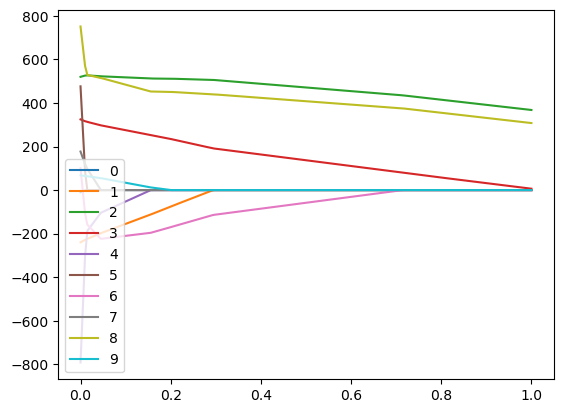

In [25]:
values = np.array(values)
import matplotlib.pyplot as plt
for i, v in enumerate(values.T):
    plt.plot(alpha, v, label=i)
plt.legend()
values

### 4. K-fold кроссвалидация и L1-регуляризация градиентным спуском.

На семинаре обсуждалось решение задачи регрессии с $L 1$-регуляризацией с помощью метода градиентного спуска. C помощью K-Fold кроссвалидаций $(K=3)$ осуществите для этого метода подбор параметров: коэффициент перед регуляризатором и параметр градиентного спуска (learning rate). В качестве данных возьмите значения какой-нибудь неполиномиальной функции на равномерной или случайной сетке (на выбор семинариста) с добавленным гауссовым шумом. Насколько стабильно по отношению к запуску работает градиентный спуск?

Указание.
Можно взять функцию градиентного спуска из семинара или встроенную реализацию.  Например, можете использовать этот код

In [12]:
def make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha):
    grad = 2 * (X @ w - y) @ X + 2 * mu * np.sign(w)
    w -= alpha * grad
    return w

In [46]:
import numpy as np

x = np.linspace(0, 2 * np.pi, 100).reshape((1, 100))
y = np.sin(x.T) @ np.cos(x)
noise = np.random.normal(scale=0.05, size=x.shape)
x = x.T @ x
y += noise

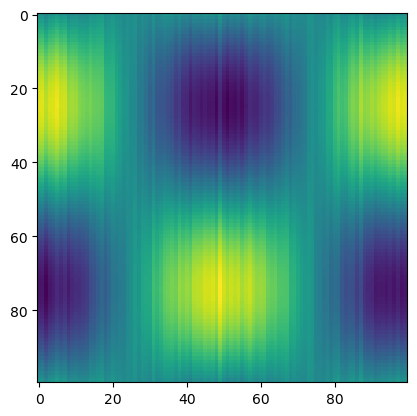

In [48]:
import matplotlib.pyplot as plt
plt.imshow(y)

In [34]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

grid = {
    'alpha': np.linspace(1e-5, 1, 100),
    'max_iter': np.arange(100, 1000, 100),
}

gs = GridSearchCV(
    estimator=Lasso(),
    param_grid=grid,
    cv=3,
    verbose=1,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

In [35]:
gs.fit(x, y)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-05, 1.01109091e-02, 2.02118182e-02, 3.03127273e-02,
       4.04136364e-02, 5.05145455e-02, 6.06154545e-02, 7.07163636e-02,
       8.08172727e-02, 9.09181818e-02, 1.01019091e-01, 1.11120000e-01,
       1.21220909e-01, 1.31321818e-01, 1.41422727e-01, 1.51523636e-01,
       1.61624545e-01, 1.71725455e-01, 1.81826364e-01, 1....
       8.48486364e-01, 8.58587273e-01, 8.68688182e-01, 8.78789091e-01,
       8.88890000e-01, 8.98990909e-01, 9.09091818e-01, 9.19192727e-01,
       9.29293636e-01, 9.39394545e-01, 9.49495455e-01, 9.59596364e-01,
       9.69697273e-01, 9.79798182e-01, 9.89899091e-01, 1.00000000e+00]),
                         'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [36]:
gs.best_params_

{'alpha': 1e-05, 'max_iter': 100}

In [37]:
gs.best_score_

-0.21160176927806185

In [52]:
import pandas as pd
df = pd.DataFrame(gs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002272,0.000465,0.001190,0.000206,0.00001,100,"{'alpha': 1e-05, 'max_iter': 100}",-0.244746,-0.134242,-0.255817,-0.211602,0.054888,1,-0.183711,-0.236081,-0.175582,-0.198458,0.026810
1,0.001422,0.000069,0.000848,0.000043,0.00001,200,"{'alpha': 1e-05, 'max_iter': 200}",-0.244746,-0.134242,-0.255817,-0.211602,0.054888,1,-0.183711,-0.236081,-0.175582,-0.198458,0.026810
2,0.001410,0.000217,0.000731,0.000121,0.00001,300,"{'alpha': 1e-05, 'max_iter': 300}",-0.244746,-0.134242,-0.255817,-0.211602,0.054888,1,-0.183711,-0.236081,-0.175582,-0.198458,0.026810
3,0.001117,0.000039,0.000632,0.000012,0.00001,400,"{'alpha': 1e-05, 'max_iter': 400}",-0.244746,-0.134242,-0.255817,-0.211602,0.054888,1,-0.183711,-0.236081,-0.175582,-0.198458,0.026810
4,0.000833,0.000022,0.000491,0.000012,0.00001,500,"{'alpha': 1e-05, 'max_iter': 500}",-0.244746,-0.134242,-0.255817,-0.211602,0.054888,1,-0.183711,-0.236081,-0.175582,-0.198458,0.026810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.001036,0.000050,0.000611,0.000038,1.0,500,"{'alpha': 1.0, 'max_iter': 500}",-1.263301,-0.240742,-1.205105,-0.903049,0.468924,892,-0.304276,-0.443170,-0.322981,-0.356809,0.061542
896,0.001032,0.000012,0.000611,0.000019,1.0,600,"{'alpha': 1.0, 'max_iter': 600}",-1.263301,-0.240742,-1.205105,-0.903049,0.468924,892,-0.304276,-0.443170,-0.322981,-0.356809,0.061542
897,0.001008,0.000022,0.000591,0.000010,1.0,700,"{'alpha': 1.0, 'max_iter': 700}",-1.263301,-0.240742,-1.205105,-0.903049,0.468924,892,-0.304276,-0.443170,-0.322981,-0.356809,0.061542
898,0.001017,0.000017,0.000592,0.000012,1.0,800,"{'alpha': 1.0, 'max_iter': 800}",-1.263301,-0.240742,-1.205105,-0.903049,0.468924,892,-0.304276,-0.443170,-0.322981,-0.356809,0.061542


### 5. Лассо Тибширани: связь L1 и L2 между собой.


Покажите, что задача минимизации квадратичной функции потерь с дополнительным ограничением (лассо Тибширани):
$$
\mathcal{L}=\|X w-y\|^2 \rightarrow \min _w, \quad \sum_\alpha\left|w_\alpha\right|<C
$$
эквивалентна L1-регуляризации. Указание: можно воспользоваться условиями Каруша - Куна — Таккера (обобщение метода Лагранжа).
[Link](https://ru.wikipedia.org/wiki/%D0%A3%D1%81%D0%BB%D0%BE%D0%B2%D0%B8%D1%8F_%D0%9A%D0%B0%D1%80%D1%83%D1%88%D0%B0_%E2%80%94_%D0%9A%D1%83%D0%BD%D0%B0_%E2%80%94_%D0%A2%D0%B0%D0%BA%D0%BA%D0%B5%D1%80%D0%B0) .

###  6*.  Bias-Variance decomposition.

Воспользуемся вероятностной моделью данных, в которой предполагается, что каждый элемент выборки независимо от других поступает из распределения $p(x, y)$. Тогда вероятность получить какой-то конкретный набор данных $\left(X_l, y_l\right)=\left(x_1, \ldots x_l ; y_1, \ldots, y_l\right)$ в обучающей выборке равна $p\left(X_l, y_l\right)=\prod_{i=1}^l p\left(x_i, y_i\right)$. В дальнейшем будем обозначать как $(x, y)$ элемент тестовой выборки, который не входит в $\left(X_l, y_l\right)$.

В выбранной модели $\check{y}=g_\theta(x)$ параметры $\theta$ определяются с помощью фиттирования по обучающей выборке: $\theta=\theta\left(X_l, y_l\right)$, поэтому $\check{y}$ зависит от $x, X_l$ и $y_l$. Тогда формальное выражение для функции потерь (соответствующее пределу бесконечной большой тестовой выборки) можно записать как
$$
L=\mathbb{E}_{X_l, y_l}\left[\mathbb{E}_{x, y}(y-\check{y})^2\right] .
$$
В этом выражении квадратичная функция потерь усредняется по элементу тестовой выборки $(x, y)$ и по обучающей выборке $\left(X_l, y_l\right)$.
Покажите, что справедливо разложение этой величины на шум, смещение и разброс:
$$
L=\underbrace{\mathbb{E}_{x, y}(y-\mathbb{E}(y \mid x))^2}_{\text {noise }}+\underbrace{\mathbb{E}_{x, y}\left(\mathbb{E}_{X_l, y_l}(\check{y})-\mathbb{E}(y \mid x)\right)^2}_{\text {bias }}+\underbrace{\mathbb{E}_{x, y}\left[\mathbb{E}_{X_l, y_l}\left(\check{y}-\mathbb{E}_{X_l, y_l} \check{y}\right)^2\right]}_{\text {variance }}
$$
Указание: сначала покажите, что
$$
\mathbb{E}_{x, y}(y-\check{y})^2=\mathbb{E}_{x, y}(y-\mathbb{E}(y \mid x))^2+\mathbb{E}_{x, y}(\mathbb{E}(y \mid x)-\check{y})^2
$$

Геометрическая иллюстрация разложения на примере линейной регрессии.

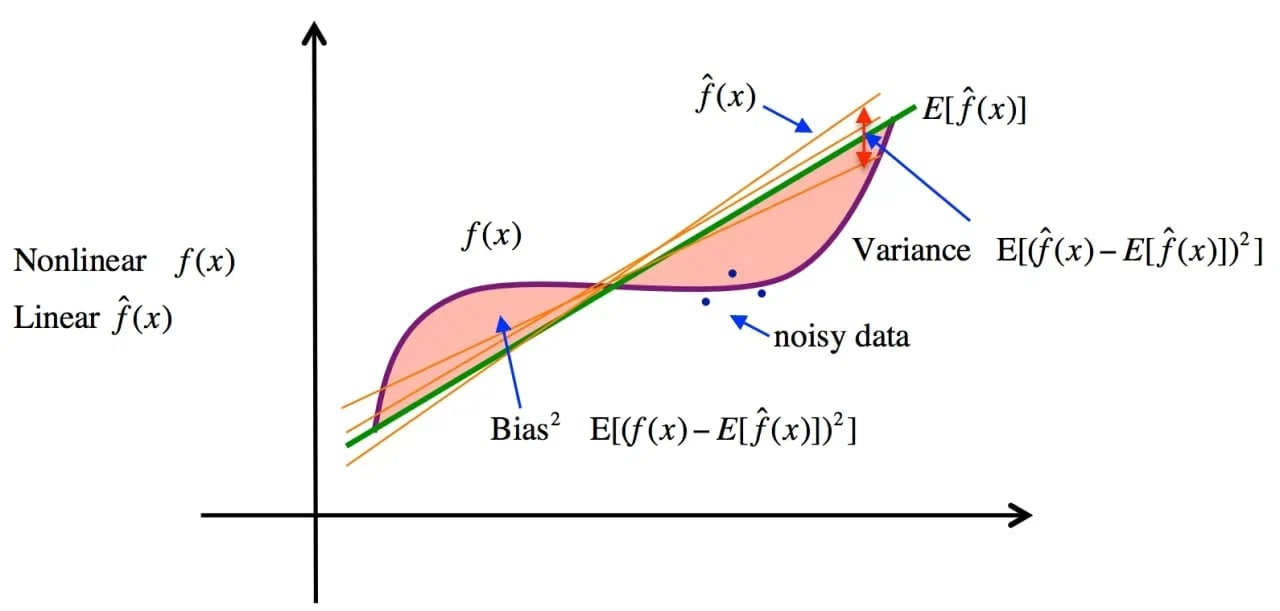

Оптимальная модель достигает минимума среднеквадратичной ошибки за счет компромисса между смещением и разбросом.

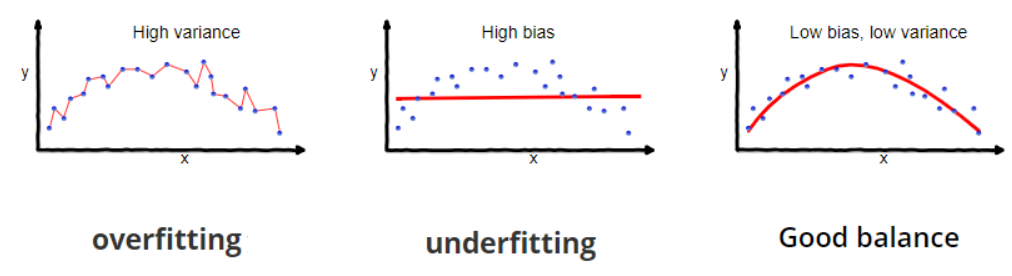

Обычно это достигается вблизи равенства двух ошибок,
но всё-таки в подавляющем большинстве случае в точке минимума ошибки присутствует некоторое смещение от равенства Bias = Variance.

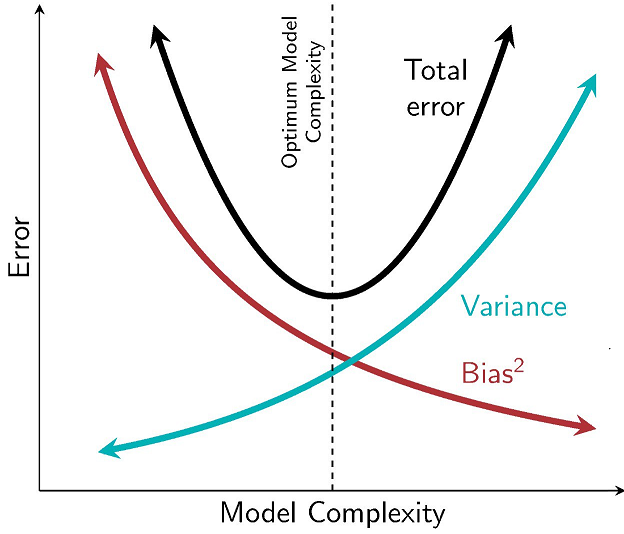